### Simulating Non Maturing deposits 

Non-maturing deposits (mainly current accounts and savings) can exhibit unpredictable cash flow patterns because the movement of funds is contingent on the behavior of the customers, who may withdraw their funds at any time. In addition, banks can alter their deposit rates at any point. As a result, there is a certain level of unpredictability associated with non-maturing deposits, which can benefit either the bank or the customer depending on the circumstances.

#### Account policy for savings
Savings consist of balances on (bank) savings accounts, savings deposits and term deposits of households. 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
from datetime import timedelta
from dateutil.parser import parse

from src.models.bank_model import Bankmodel
from src.data.zerocurve import Zerocurve
from src.data.interest import Interest
import seaborn as sns


In [2]:
# Create data objects
zerocurve = Zerocurve()
interest = Interest()
# Load data from csv file - not directly from ECB
zerocurve.load_data()
interest.load_data()

2023-03-20 13:28:16.747 | INFO     | src.data.dataset:load_data:45 - loading zerocurve data from file.
c:\Users\M\miniconda3\envs\rlalm\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
2023-03-20 13:28:16.962 | INFO     | src.data.dataset:load_data:45 - loading interest data from file.


In [3]:
pos_date = parse('28-02-2023')
bankmodel = Bankmodel(pos_date)

In [4]:

bankmodel.generate_nonmaturing_deposits(principal = 1000000, core = 0.4, maturity = 54)

,period,cashflow,value_dt,type
0,1,-600000,2023-03-01,deposits
1,2,-400000,2027-08-28,deposits


In [5]:
bankmodel.df_cashflows

,period,cashflow,value_dt,type
0,1,-600000,2023-03-01,deposits
1,2,-400000,2027-08-28,deposits


In [6]:
bankmodel.plot_contracts();

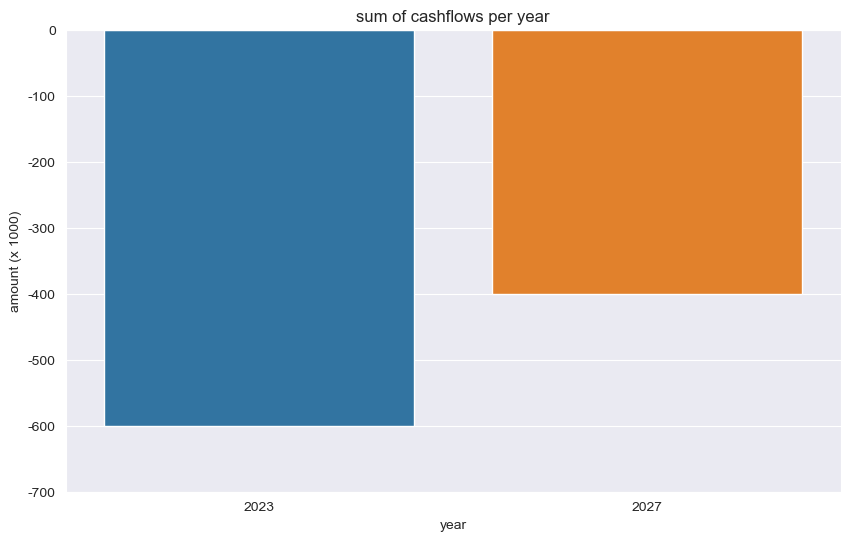

In [7]:
bankmodel.plot_cashflows()

### npv calculation

$$NPV = {{Cashflow} \over (1+i)^T}.$$
$$DF_0^T = [1+R_{zc}]^{-T})$$
where:
- $DF_0^T$  = a discount factor with maturity T
- $R_{zc}$ = A zero coupon interest rate
- $T$ = Maturity of the zero rate, in years (calculated as days/365)

In [8]:
bankmodel.calculate_npv(zerocurve)

-956202.23

In [9]:
bankmodel.step()
zerocurve.step()
bankmodel.calculate_npv(zerocurve)
df_returns = bankmodel.calculate_risk(zerocurve,200,'Parallel')

df_returns

2023-03-20 13:28:42.260 | DEBUG    | src.data.zerocurve:step:124 - Stepping in zerocurve 2023-03-01 00:00:00.


29748.099999999977

2023-03-20 13:28:47.451 | DEBUG    | src.data.zerocurve:step:124 - Stepping in zerocurve 2023-03-02 00:00:00.
2023-03-20 13:28:47.488 | DEBUG    | src.data.zerocurve:step:124 - Stepping in zerocurve 2023-03-03 00:00:00.
2023-03-20 13:28:47.531 | DEBUG    | src.data.zerocurve:step:124 - Stepping in zerocurve 2023-03-06 00:00:00.
2023-03-20 13:28:47.571 | DEBUG    | src.data.zerocurve:step:124 - Stepping in zerocurve 2023-03-07 00:00:00.
2023-03-20 13:28:47.612 | DEBUG    | src.data.zerocurve:step:124 - Stepping in zerocurve 2023-03-08 00:00:00.
2023-03-20 13:28:47.651 | DEBUG    | src.data.zerocurve:step:124 - Stepping in zerocurve 2023-03-09 00:00:00.
2023-03-20 13:28:47.683 | DEBUG    | src.data.zerocurve:step:124 - Stepping in zerocurve 2023-03-10 00:00:00.
2023-03-20 13:28:47.718 | DEBUG    | src.data.zerocurve:step:124 - Stepping in zerocurve 2023-03-13 00:00:00.
2023-03-20 13:28:47.751 | DEBUG    | src.data.zerocurve:step:124 - Stepping in zerocurve 2023-03-14 00:00:00.
2023-03-20

<AxesSubplot:>

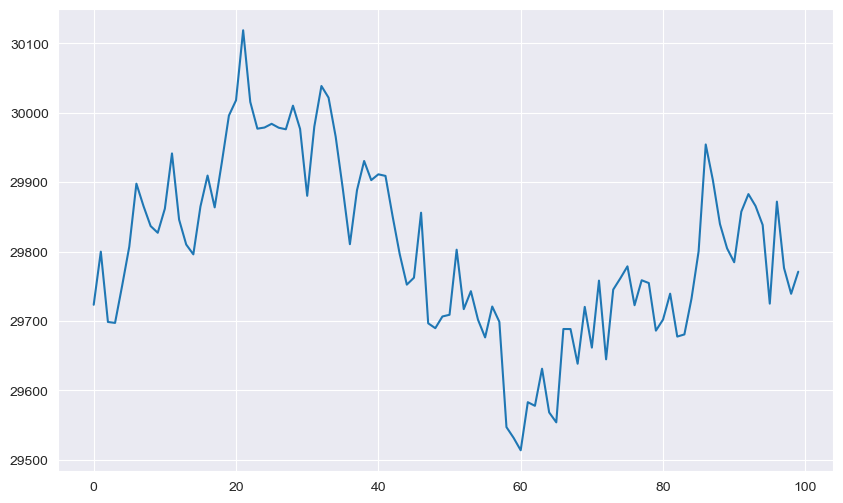

In [10]:
# run an episode of 100 steps

risk = []
for i in range(100):
    bankmodel.step()
    zerocurve.step()
    risk.append(bankmodel.calculate_risk(zerocurve,200,'Parallel'))    
sns.lineplot(risk)

In [11]:
bankmodel.reset()
zerocurve.reset()

c:\Users\M\miniconda3\envs\rlalm\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [12]:
bankmodel.calculate_npv(zerocurve)

-944980.72

Non Maturity Deposits

#### Core vs Non Core balances
For saving deposits a cap on the average maturity of the core deposits is set at 4.5 years. 
In general 70% - 90% of the deposits can be classied as core capital. (See guidelines BCBS)